In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [4]:
#reading data
data=pd.read_csv("/content/india-news-headlines.csv")
data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [ ]:
def label_plot(x, y, title):
    """
    Labels the x-axis, y-axis and title of the given plot
    
    This procedure uses the matplotlib library to label the aforementioned elements of the given plot
    
    Parameter x: The value to be set as the x-label
    Precondition: Value passed should be of String type
    
    Parameter y: The value to be set as the y-label
    Precondition: Value passed should be of String type
    
    Parameter title: The value to be set as the title
    Precondition: Value passed should be of String type
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

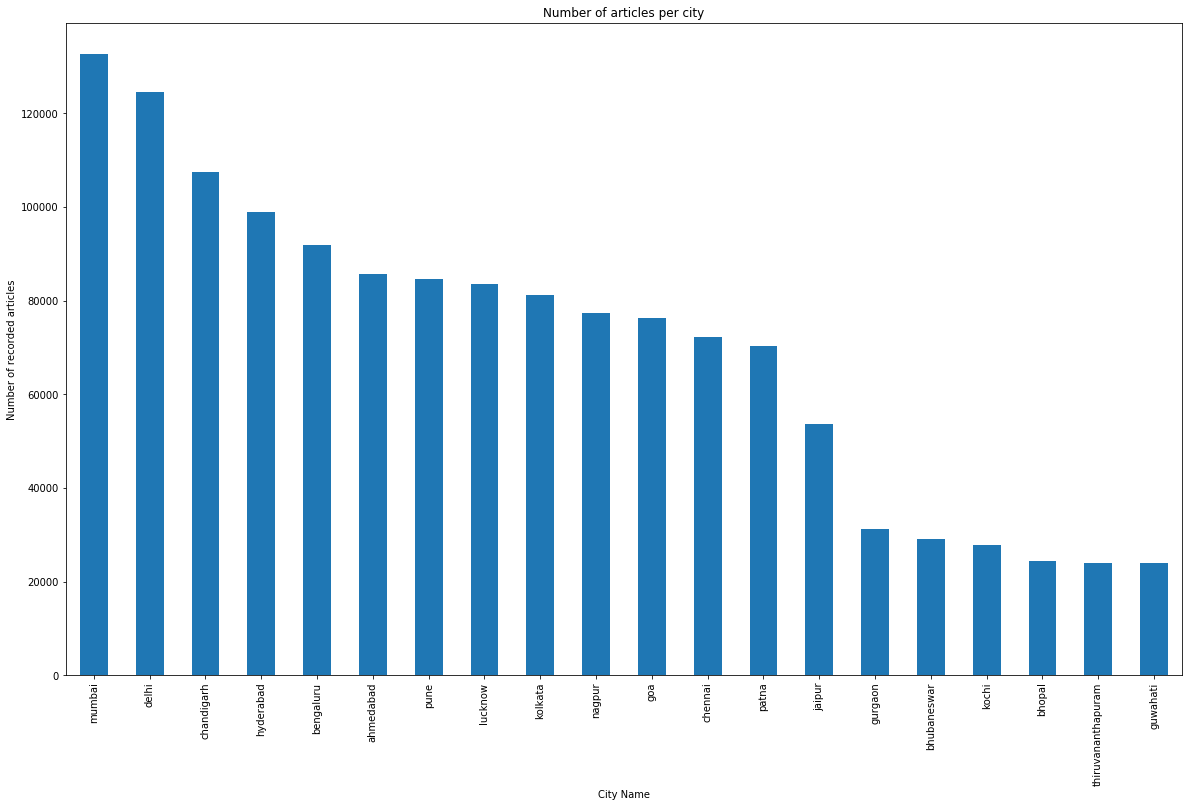

In [ ]:
#Volume of coverage per city
data_cities = data[data['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
data_cities['city_name'] = data_cities.headline_category.str[5:]
city_list = data_cities['city_name'].unique().tolist()

#Bar chart of covrage by cities in descending order
grp_city = data_cities.groupby(['city_name'])['headline_text'].count().nlargest(20)
ts = pd.Series(grp_city)
ts.plot(kind='bar', figsize=(20,12))
label_plot('City Name', 'Number of recorded articles', 'Number of articles per city')
plt.show()

In [ ]:
#Year-wise coverage for cities
data['publish_date'] = pd.to_datetime(data['publish_date'])
data['year'] = data['publish_date'].apply(lambda x: (x.microsecond)//10)
data = data.drop('publish_date', axis = 1)
data = data.reset_index(drop=True)
data_cities = data_cities.reset_index(drop=True)
data_cities['year'] = data['year']
data_cities = data_cities.drop('headline_category', axis = 1)

In [ ]:
data_cities2 = data_cities
data_cities2['headline_text'] = 1

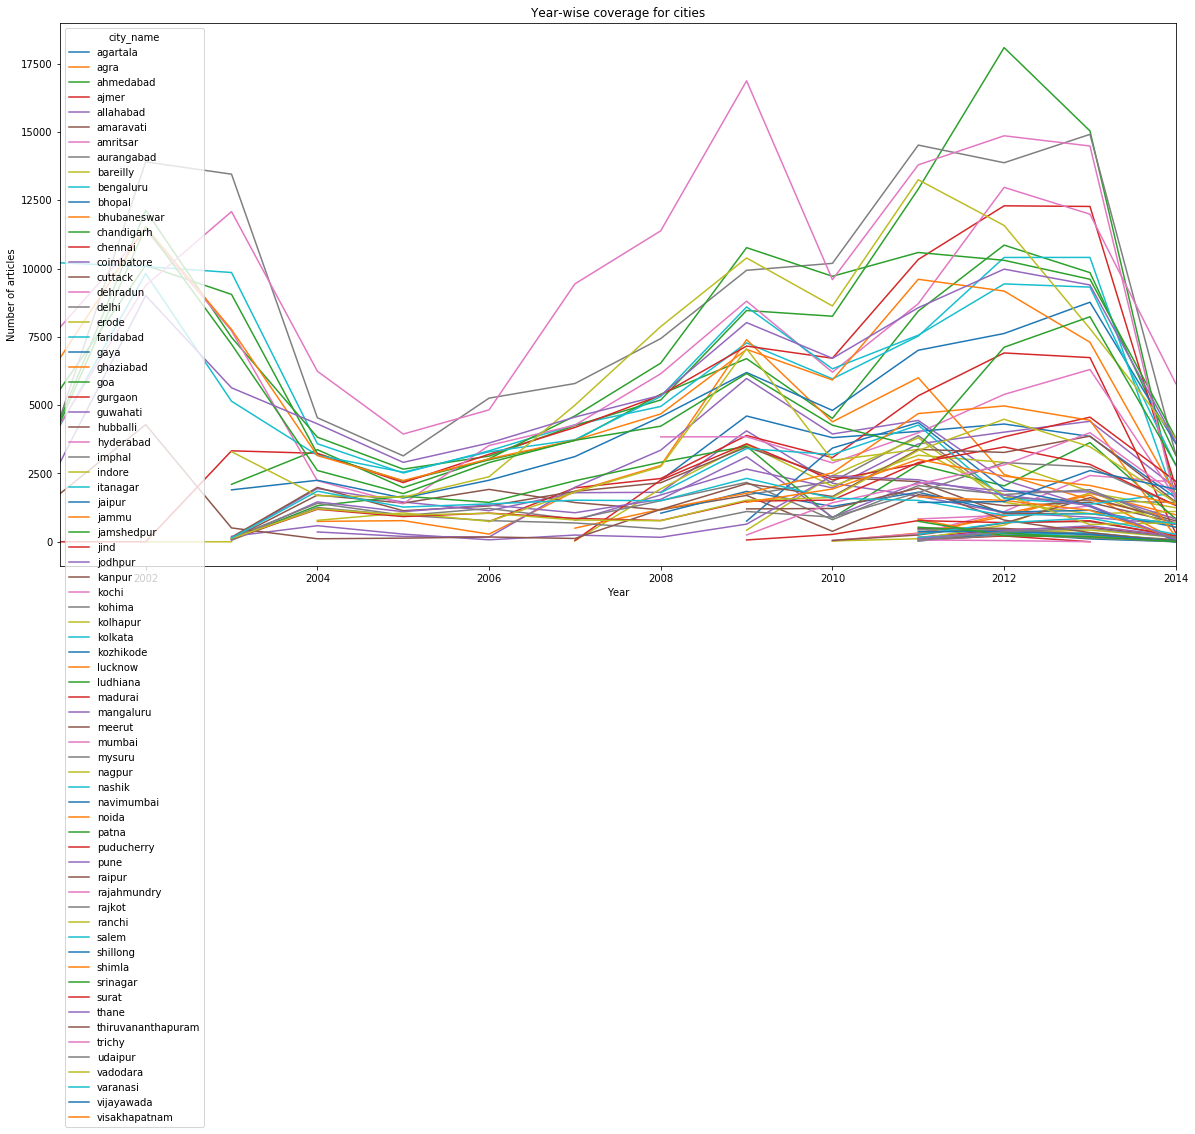

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
grp = data_cities2.groupby(['year', 'city_name']).sum()['headline_text'].unstack().plot(ax=ax)
label_plot('Year', 'Number of articles', 'Year-wise coverage for cities')
plt.show()

In [ ]:
data_cities_del = data_cities[data_cities.city_name == 'delhi']
data_cities_mum = data_cities[data_cities.city_name == 'mumbai']
data_cities_kol = data_cities[data_cities.city_name == 'kolkata']
data_cities_ben = data_cities[data_cities.city_name == 'bengaluru']
data_cities_pun = data_cities[data_cities.city_name == 'pune']
data_cities_hyd = data_cities[data_cities.city_name == 'hyderabad']
data_cities_che = data_cities[data_cities.city_name == 'chennai']

In [ ]:
frames_metros = [data_cities_mum, data_cities_del, data_cities_che, data_cities_ben, data_cities_kol, data_cities_hyd, data_cities_pun]
data_cities_metros = pd.concat(frames_metros)

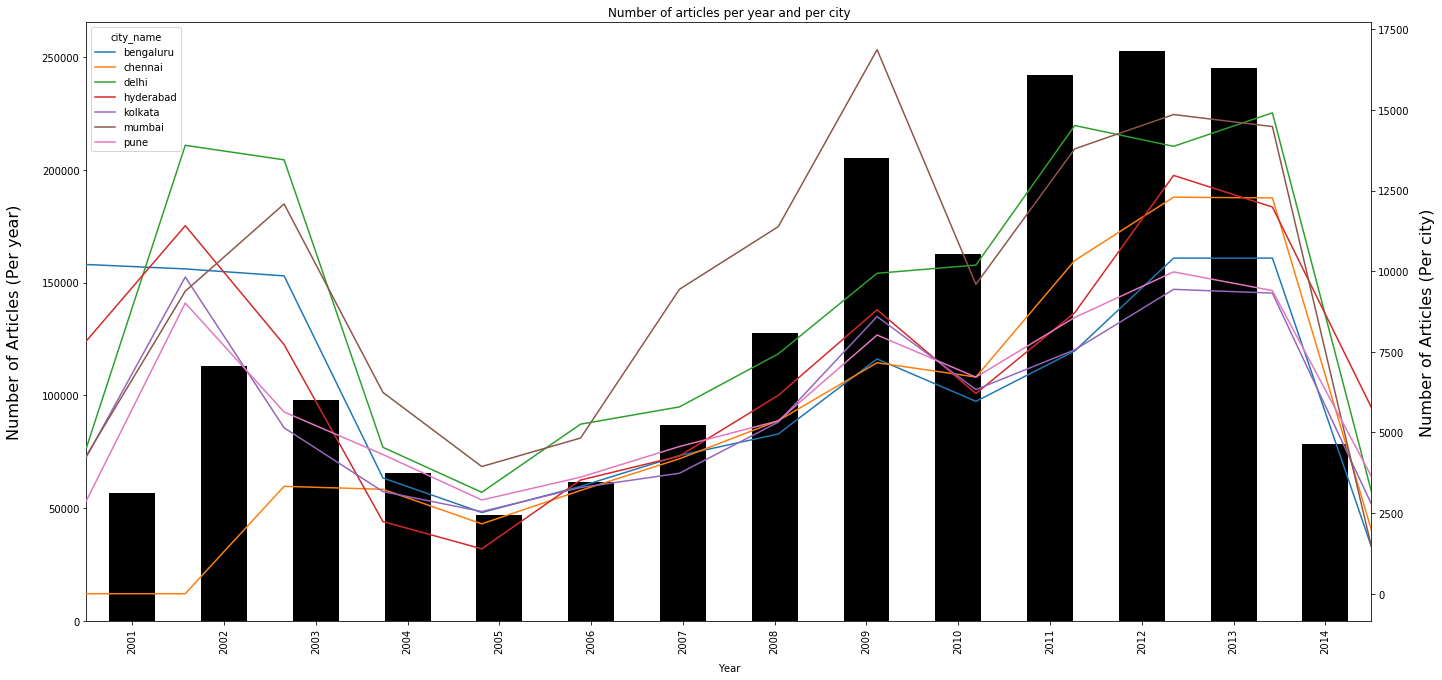

In [ ]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")
b = fig.add_subplot(111,label="2", frame_on = False)

#Coverage relevant to cities per year
ts = pd.Series(data_cities.groupby(['year'])['headline_text'].count())
ts.plot(kind='bar', figsize=(20,10), ax=a, color="black", title="Number of articles per year and per city")
a.set_ylabel('Number of Articles (Per year)', size =16)
a.set_xlabel("")

ts2 = data_cities_metros.groupby(['year', 'city_name']).sum()['headline_text'].unstack()
ts2.plot(ax=b)
b.set_xticks([])
b.set_ylabel('Number of Articles (Per city)', size =16)
b.yaxis.tick_right()
b.set_xlabel('Year') 

a.get_yaxis().set_label_coords(-.05,0.5)
b.get_yaxis().set_label_coords(1.05,0.5)
b.get_xaxis().set_label_coords(0.5, -0.07)
plt.tight_layout()
plt.show()

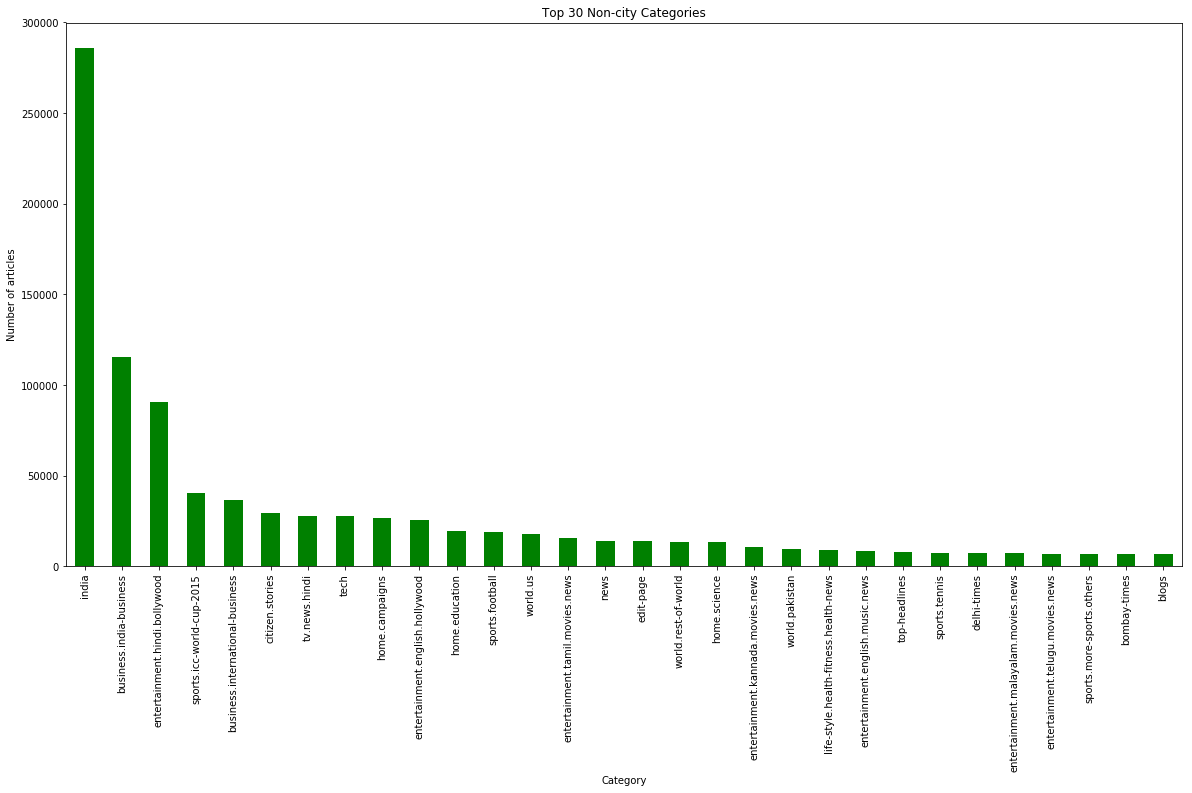

In [ ]:
data_non_cities = data[~data['headline_category'].str.contains('city', regex=False)]

non_cities = data_non_cities.groupby(['headline_category'])['headline_text'].count()
non_cities = non_cities.drop('unknown')
non_cities = non_cities.drop('removed')
non_cities = non_cities.drop('top-stories')
non_cities['tech'] += non_cities['tech.tech-news']
non_cities = non_cities.drop('tech.tech-news')
non_cities = non_cities.nlargest(30)
ts = pd.Series(non_cities)
ts.plot(kind='bar', figsize=(20,10), color='green')
label_plot('Category', 'Number of articles', 'Top 30 Non-city Categories')

plt.show()

In [ ]:
#Sentiment Analysis
def analyze_polarity(headline):
    """
    Returns a value based on the polarity of the given text using TextBlob
    
    This function uses the TextBlob library to perform sentiment analysis and analyse the polarity of the
    passed headline. It returns '1' if the sentiment is positive, '-1' if the sentiment is negative, and
    '0' if the sentiment is neutral.
    
    Parameter headline: The text whose sentiment is to be determined
    Precondition: It should be a non-empty value of type String
    """
    result = TextBlob(headline)
    if result.sentiment.polarity > 0:
        return 1
    elif result.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
data['Result'] = np.array([analyze_polarity(headline) for headline in data['headline_text']])

In [ ]:
positive_headlines = [ head for index, head in enumerate(data['headline_text']) if data['Result'][index] > 0]
unbiased_headlines = [ head for index, head in enumerate(data['headline_text']) if data['Result'][index] == 0]
negative_headlines = [ head for index, head in enumerate(data['headline_text']) if data['Result'][index] < 0]

In [ ]:
o_pos = len(positive_headlines)*100/len(data['headline_text'])
o_neg = len(negative_headlines)*100/len(data['headline_text'])
o_un = len(unbiased_headlines)*100/len(data['headline_text'])

In [ ]:
print('Positive Headlines: ' + str(o_pos) + '\nNegative Headlines: ' + str(o_neg) + '\nUnbiased Headlines: ' + str(o_un))

Positive Headlines: 18
Negative Headlines: 12
Unbiased Headlines: 69
